# Telecom Churn Case Study

1. Data Reading and Understanding.
2. Data Cleaning and EDA
3. Data Preprocessing.
4. Modeling.
5. Recommendations.

## 1.Data Reading and Understanding

In [1]:
#importing libraries
import numpy as np , pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.decomposition import PCA


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
len(df.mobile_number.unique())

99999

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
df.shape

(99999, 226)

In [6]:
df.describe(include='object')

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
count,99999,99398,98899,98340,98392,98232,96377,95239,25153,25571,26339,25922
unique,1,1,1,1,30,31,31,30,30,31,31,30
top,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014
freq,99999,99398,98899,98340,16960,17288,14706,22623,1888,1813,1998,2329


## 2.Data Cleaning & Exploratory Data Analysis

# EDA

In [7]:
sns.set_theme(style='white')

In [8]:
def boxs(y):
    plt.figure(figsize=(12,5))
    plt.title('Box Plot of ' + y.name,fontdict={'size':20,'family': 'serif'})
    sns.boxplot(y=y)
def hist(y):
    plt.figure(figsize=(12,5))
    plt.title('Box Plot of ' + y.name,fontdict={'size':20,'family': 'serif'})
    sns.histplot(y)

### Missing Value Treatment

In [9]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).head(100)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

- <b>Dropping columns with more than 70% missing value.

In [10]:
df.dropna(thresh=df.shape[0]*0.7,axis=1,inplace=True)

- <b> Filling rest of the categorical & numerical columns with mode & median respectively.

In [11]:
cat_col = df.select_dtypes(include='object').columns
df[cat_col].isna().sum()/len(df)

last_date_of_month_6    0.00000
last_date_of_month_7    0.00601
last_date_of_month_8    0.01100
last_date_of_month_9    0.01659
date_of_last_rech_6     0.01607
date_of_last_rech_7     0.01767
date_of_last_rech_8     0.03622
date_of_last_rech_9     0.04760
dtype: float64

In [12]:
# categorical columns
cat_col = df.select_dtypes(include='object').columns

df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0])

In [13]:
df[cat_col].isna().sum()

last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
last_date_of_month_9    0
date_of_last_rech_6     0
date_of_last_rech_7     0
date_of_last_rech_8     0
date_of_last_rech_9     0
dtype: int64

In [14]:
#numericals
df.fillna(df.fillna(df.median()),inplace=True)

In [15]:
df.isna().sum().sort_values(ascending=False).head()

sep_vbc_3g          0
std_og_t2f_mou_7    0
std_og_mou_8        0
std_og_mou_7        0
std_og_mou_6        0
dtype: int64

In [16]:
df.shape

(99999, 186)

### Filtering High Value Customers 

In [17]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] +df['total_rech_amt_7']) / 2
df.avg_rech_amt_6_7

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: avg_rech_amt_6_7, Length: 99999, dtype: float64

In [18]:
bottom_70 = df.avg_rech_amt_6_7.quantile(.7)

- <b> Retaining only the top 30% of customers.

In [19]:
df = df[df['avg_rech_amt_6_7'] > bottom_70]
df.shape

(29979, 187)

In [20]:
to_drop = ['avg_rech_amt_6_7']

### Deriving Target Variable.

In [21]:
month_9 = df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
month_9.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
17,87.13,631.08,0.0,0.0


In [22]:
df['Churn'] = (~month_9.any(axis=1)).map(lambda x : 1 if (x==True) else 0)

In [23]:
df.Churn

7        1
8        0
13       0
16       0
17       0
        ..
99970    0
99974    0
99986    0
99988    0
99997    0
Name: Churn, Length: 29979, dtype: int64

In [24]:
df.Churn.mean()*100

8.636045231662164

In [25]:
df.shape

(29979, 188)

- <b>Dropping all the columns for september month.

In [26]:
to_drop.extend([x for x in df.columns if x[-2:]=='_9'])

In [27]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,Churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50

- <b> Dropping Highly skewed columns.

In [28]:
num_col = df.select_dtypes(exclude='object').columns

def binning(x):
    if x == 'Churn' :
        pass
    elif x in ['fb_user_6',"fb_user_7","fb_user_8","fb_user_9"]:
        pass
    elif list(df[x].value_counts(normalize=True) > 0.75)[0] :
        to_drop.append(x)
        
for x in num_col:
    binning(x)

In [29]:
to_drop.extend(['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7','loc_og_t2f_mou_8', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8','loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
'std_ic_t2t_mou_6','std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 
'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7', 'std_ic_t2f_mou_8','ic_others_6', 
'ic_others_8','date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8', 'last_day_rch_amt_6', 
'last_day_rch_amt_7','last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8','vol_3g_mb_7', 'aug_vbc_3g', 
'jul_vbc_3g','mobile_number'])

In [30]:
df.drop(to_drop,axis=1,inplace=True)

### Deriving new columns

- <b>total_rech_amt_6_7_8

In [31]:
df['total_rech_amt_6_7_8'] = df.total_rech_amt_6 + df.total_rech_amt_7 + df.total_rech_amt_8

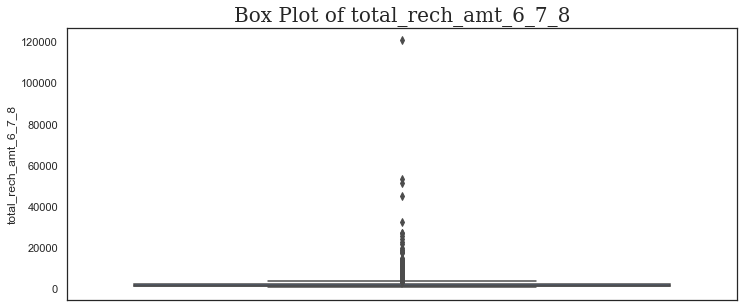

In [32]:
boxs(df.total_rech_amt_6_7_8)

In [33]:
df.shape

(29979, 60)

- <b>total_og_6_7_8

In [34]:
df["total_og_6_7_8"] = df.total_og_mou_6 + df.total_og_mou_7 + df.total_og_mou_8

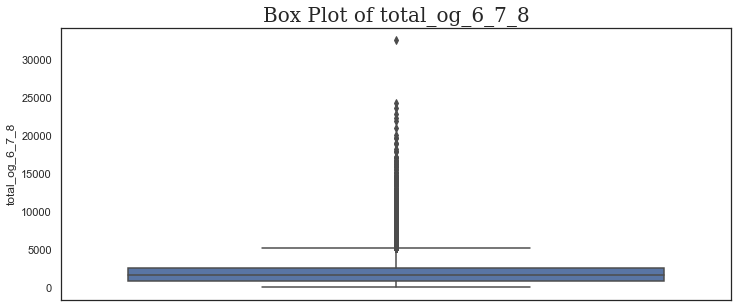

In [35]:
boxs(df.total_og_6_7_8)

- <b>total_ic_6_7_8

In [36]:
df["total_ic_6_7_8"] = df.total_ic_mou_6 + df.total_ic_mou_7 +df.total_ic_mou_8

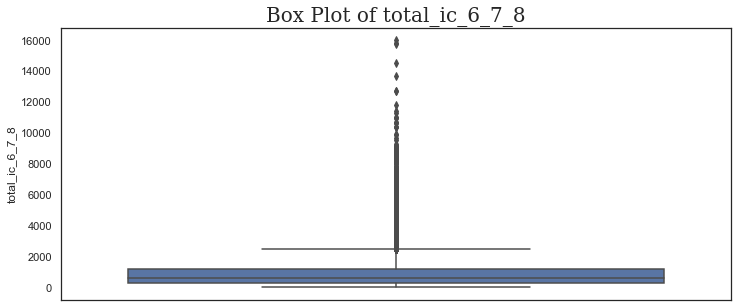

In [37]:
boxs(df.total_ic_6_7_8)

- <b> Dropping negative values before transforming

In [38]:
df.drop(df[df['arpu_6'] < 0].index ,axis=0,inplace=True)

df.drop(df[df['arpu_7'] < 0].index ,axis=0,inplace=True)

df.drop(df[df['arpu_8'] < 0].index ,axis=0,inplace=True)

- <b> Transforming values to treat outliers

In [39]:
num_col = df.select_dtypes(exclude='object').columns
transform_vars = list(num_col)
for x in ['aon','Churn','total_rech_num_6', 'total_rech_num_7','total_rech_num_8']:
    transform_vars.remove(x)

In [40]:
df[transform_vars] = df[transform_vars].apply(lambda x : np.sqrt(x))

In [ ]:
# For checking outliers in numerical columns
# num_col = df.select_dtypes(exclude='object').columns
# for x in df[num_col].columns:
#     boxs(df[x])

- <b> Fine tuning extreme outliers.

- total_rech_amt_6_7_8 

In [41]:
df['total_rech_amt_6_7_8'] = df.total_rech_amt_6 + df.total_rech_amt_7 + df.total_rech_amt_8

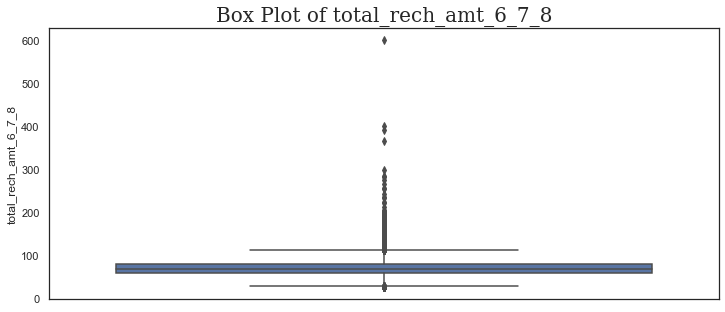

In [42]:
boxs(df.total_rech_amt_6_7_8)

In [43]:
Q = df.total_rech_amt_6_7_8.quantile(.99)
df.drop(df[df.total_rech_amt_6_7_8 > Q].index,inplace=True)

In [44]:
df.shape

(29531, 62)

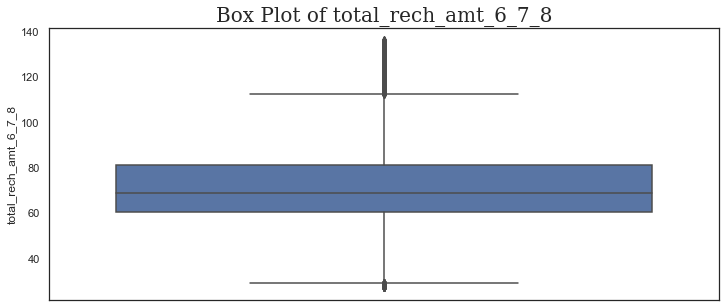

In [45]:
boxs(df.total_rech_amt_6_7_8)

-  total_rech_num_6

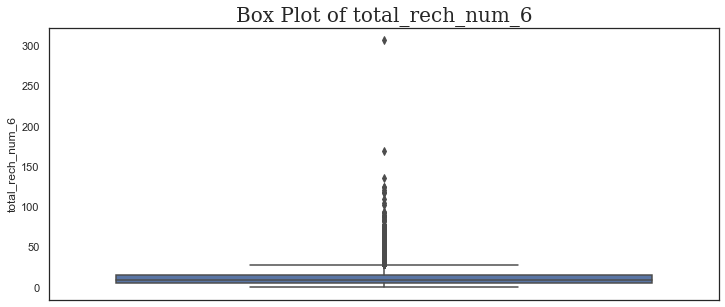

In [46]:
boxs(df.total_rech_num_6)

In [47]:
Q = df.total_rech_num_6.quantile(.99)
df.drop(df[df.total_rech_num_6 > Q].index,inplace=True)

In [48]:
df.shape

(29248, 62)

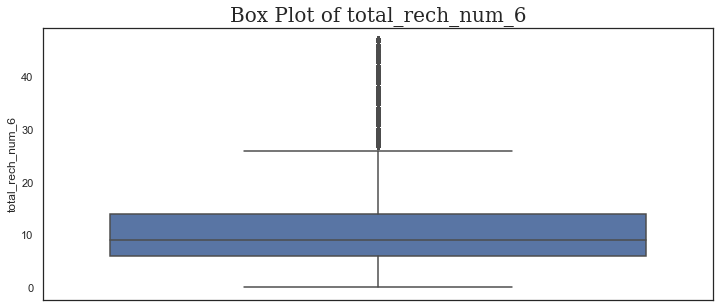

In [49]:
boxs(df.total_rech_num_6)

-  total_rech_num_8

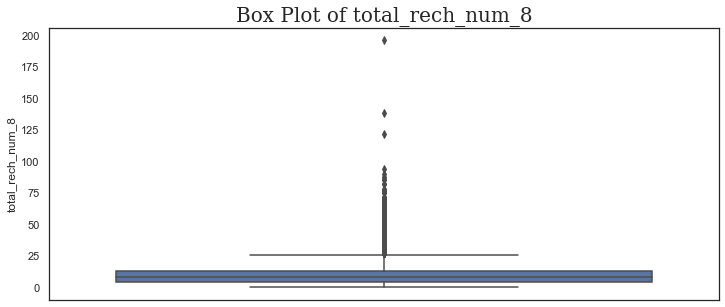

In [50]:
boxs(df.total_rech_num_8)

In [51]:
df.drop(df[df.total_rech_num_8 > 80].index,inplace=True)

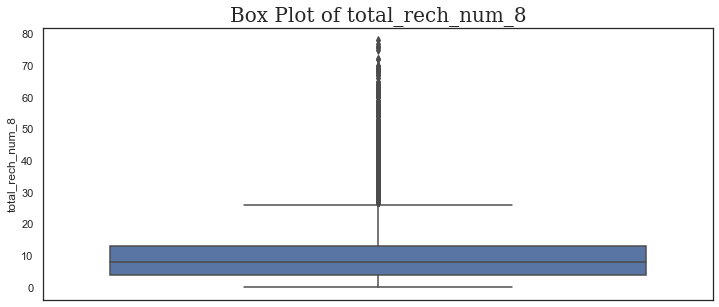

In [52]:
boxs(df.total_rech_num_8)

In [54]:
df.drop(df.select_dtypes('object').columns,inplace=True,axis = 1)

In [55]:
df.shape

(29238, 59)

### Train Test Split

In [56]:
X = df.drop('Churn',1).copy()
y = df.Churn.copy()

In [57]:
print(X.shape,y.shape)

(29238, 58) (29238,)


In [58]:
df.Churn.value_counts(normalize=True)*100

0    91.630754
1     8.369246
Name: Churn, dtype: float64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(20466, 58) (20466,)
(8772, 58) (8772,)


### Data Imbalance

In [61]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_sample(X_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

<AxesSubplot:xlabel='Churn', ylabel='count'>

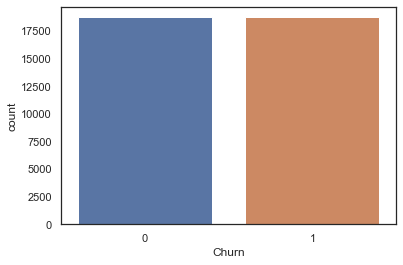

In [62]:
sns.countplot(oversampled_Y)

### Scaling the data

In [63]:
oversampled_X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,aon,total_rech_amt_6_7_8,total_og_6_7_8,total_ic_6_7_8
0,15.724789,17.791571,18.762436,8.834025,10.056341,7.685050,14.483094,16.180544,18.151584,8.834025,10.035437,7.685050,12.226201,14.038518,16.677530,15.899057,18.773385,18.755266,0.000000,0.640312,0.000000,0.574456,0.655744,3.264966,0.574456,0.916515,3.264966,16.964964,19.050984,19.711418,7.803204,7.459222,6.376519,4.982971,7.521968,6.609085,9.259050,10.934350,9.337023,0.866025,2.964793,3.525621,9.318262,11.380246,9.980481,7,8,2,17.606817,22.315914,16.431677,10.488088,11.313708,11.832160,321,56.354407,32.238021,17.774982
1,14.197324,22.959225,15.658576,10.939835,16.858529,14.398958,5.647123,10.960839,10.247439,0.000000,0.000000,1.109054,0.000000,0.000000,0.000000,0.000000,0.000000,1.109054,0.000000,0.000000,7.471948,0.000000,0.000000,1.469694,0.000000,0.000000,7.615117,0.000000,0.000000,7.696103,0.000000,0.000000,2.451530,0.000000,0.000000,0.000000,0.000000,0.000000,2.451530,0.000000,0.000000,2.570992,0.000000,0.000000,3.553871,4,8,6,17.606817,28.425341,11.313708,10.954451,13.928388,11.313708,694,57.345866,7.696103,3.553871
2,14.219705,31.228192,14.271790,16.801190,30.781975,2.321637,3.766962,16.925720,14.454411,2.517936,7.059037,2.321637,3.766962,4.677606,12.329234,4.532108,8.468176,12.598016,16.611141,29.961475,0.000000,0.000000,16.266223,7.457211,16.611141,34.092375,7.457211,17.218595,35.148826,14.640014,0.000000,4.948737,0.000000,3.657868,8.887632,32.545199,3.657868,10.270832,32.545199,0.000000,21.035209,0.000000,3.657868,23.412817,32.545199,3,21,2,0.000000,33.882149,15.811388,0.000000,12.247449,15.811388,275,49.693537,41.788156,40.258291
3,20.999857,28.138710,19.945526,0.000000,4.730750,1.513275,11.884023,11.561142,11.891594,0.000000,4.730750,1.513275,11.469961,10.921996,11.605171,11.767753,12.337342,11.987911,0.000000,0.000000,0.000000,1.655295,1.957039,0.000000,1.655295,1.957039,0.000000,11.941105,12.491597,11.987911,4.962862,0.883176,1.442221,4.739198,10.877959,9.267146,7.932843,11.010904,9.456744,0.000000,0.670820,0.974679,7.932843,11.031319,9.506840,4,2,2,31.622777,22.360680,31.622777,22.360680,22.360680,22.360680,1236,85.606233,21.031881,16.583124
4,31.174461,39.302303,38.045959,4.075537,3.986226,12.924009,38.303916,54.925040,49.294827,1.157584,3.595831,7.039886,4.586938,7.287661,12.133013,4.731807,8.126500,14.027829,1.019804,1.720465,10.837896,36.412772,54.224625,47.742120,36.427188,54.252005,48.956920,36.819288,55.432301,51.639907,5.932116,8.636550,5.499091,7.931582,11.122500,12.074353,9.905049,14.226384,13.268007,3.518522,5.526301,4.793746,10.589618,15.262372,14.112406,18,32,22,29.342802,44.283180,40.199502,10.000000,12.247449,15.811388,762,113.825484,84.232298,23.328952


In [64]:
# Using Standard Scaler
scaler = StandardScaler()

X_train = scaler.fit_transform(oversampled_X)
X_train = pd.DataFrame(X_train,columns=oversampled_X.columns) 

In [65]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,aon,total_rech_amt_6_7_8,total_og_6_7_8,total_ic_6_7_8
0,-1.144288,-0.594157,0.234260,-0.562226,-0.360109,-0.296683,-0.412948,-0.130994,0.493798,0.415348,0.703566,0.497809,0.324985,0.668140,1.294797,0.396013,0.826891,1.055662,-0.885070,-0.786951,-0.625679,-0.966644,-0.909589,-0.392741,-1.197027,-1.106171,-0.604273,-0.607443,-0.288419,0.309127,0.424677,0.405909,0.370193,-0.757463,-0.301721,-0.236902,-0.389459,-0.107272,-0.102868,-0.925635,-0.433501,-0.050077,-0.594224,-0.258412,-0.017219,-0.665615,-0.374315,-0.731790,-1.045523,-0.141585,-0.029076,-0.278524,-0.026538,0.455946,-0.859590,-0.490749,-0.397032,-0.432163
1,-1.377706,0.152750,-0.075309,-0.357946,0.320457,0.433385,-1.339184,-0.684767,-0.379918,-1.110148,-1.074704,-0.715530,-1.484408,-1.446042,-1.187371,-1.523960,-1.478922,-1.077536,-0.885070,-0.845705,0.166130,-1.018757,-0.970770,-0.591718,-1.238593,-1.174120,-0.242174,-2.040701,-1.866763,-0.592818,-1.255773,-1.226972,-0.508609,-1.556533,-1.536685,-1.306176,-1.642604,-1.608586,-1.027952,-1.111461,-1.074061,-0.275365,-1.758031,-1.668659,-0.726471,-1.066724,-0.374315,-0.210492,-1.045523,0.605615,-0.471406,-0.174925,0.514037,0.372384,-0.449936,-0.437241,-1.844432,-1.562711
2,-1.374286,1.347906,-0.213622,0.210653,1.713511,-0.879898,-1.536273,-0.051936,0.085116,-0.675340,0.176151,-0.491796,-0.926924,-0.741600,0.647627,-0.976662,-0.438831,0.311330,0.579660,1.903540,-0.625679,-1.018757,0.546883,0.071902,-0.036654,1.353446,-0.255318,-0.586015,1.045262,-0.071564,-1.255773,-0.143655,-1.057504,-0.969957,-0.077505,3.959263,-1.147538,-0.198374,3.015210,-1.111461,3.470708,-0.882109,-1.301181,1.232671,2.473061,-1.200427,1.214104,-0.731790,-3.467939,1.272997,-0.082686,-2.608387,0.166509,1.097297,-0.910110,-0.850226,0.166203,1.355213
3,-0.338182,0.901367,0.352258,-1.419198,-0.892940,-0.967799,-0.685398,-0.621079,-0.198175,-1.110148,-0.236419,-0.640947,0.213067,0.198796,0.539862,-0.102884,0.036393,0.237577,-0.885070,-0.845705,-0.625679,-0.868592,-0.788177,-0.754610,-1.118821,-1.029028,-0.876043,-1.031876,-0.831854,-0.270648,-0.187001,-1.033638,-0.734592,-0.796555,0.249269,0.193142,-0.568952,-0.096761,-0.086784,-1.111461,-0.929126,-0.652088,-0.767256,-0.301652,-0.069491,-1.066724,-1.107432,-0.731790,0.882849,-0.136110,1.283844,2.358897,2.257381,2.152877,0.145326,1.087929,-1.057933,-0.526913
4,1.216643,2.514898,2.157536,-1.023838,-0.967430,0.272999,2.084083,3.979519,3.936341,-0.910251,-0.437526,0.378769,-0.805573,-0.348530,0.618423,-0.952546,-0.480797,0.484176,-0.795146,-0.687837,0.522823,2.284535,4.088436,4.536837,1.397184,2.848056,3.199042,1.069918,2.725716,2.705880,0.021731,0.663635,0.173738,-0.284624,0.289417,0.647315,-0.302028,0.344733,0.425269,-0.356481,0.119926,0.249196,-0.435438,0.222663,0.438787,0.805119,2.558151,1.874701,0.569161,2.545071,2.025104,-0.386950,0.166509,1.097297,-0.375253,2.610881,2.669418,0.009366


# Continue From here using X_train, y_test, X_test, y_test

## Trimming Outliers

In [66]:
# for x in df[num_col].columns:
#     boxs(x)

In [67]:
# def remove_outliers(df_,outlier_col):
    
#     Q = df_[outlier_col].quantile(0.99)

#     df_ = df_[df_[outlier_col] <= Q]
#     return df_

In [68]:
# def remove_outliers(x):
#     Q = df[x].quantile(.99)
#     df.drop(df[df[x] > Q].index ,axis=0,inplace=True)

## For EDA

In [69]:
# for x in df[num_col].columns:
#     print(df[x].value_counts(normalize=True,dropna=False)*100)
#     print('\n')

In [70]:
# def box(mon6,mon7,mon8,mon9):
#     plt.figure(figsize=(20,10))

#     plt.subplot(2,2,1)
#     plt.title('Box Plot of ' + mon6.name + ' vs ' + 'Churn',fontdict={'size':20,'family': 'serif'})
#     sns.boxplot(x=df['Churn'],y=mon6)
#     sns.despine(offset=10, trim=True)

#     plt.subplot(2,2,2)
#     plt.title('Box Plot of ' + mon7.name + ' vs ' + 'Churn',fontdict={'size':20,'family': 'serif'})
#     sns.boxplot(x=df['Churn'],y=mon6)
#     sns.despine(offset=10, trim=True)

#     plt.subplot(2,2,3)
#     plt.title('Box Plot of ' + mon8.name + ' vs ' + 'Churn',fontdict={'size':20,'family': 'serif'})
#     sns.boxplot(x=df['Churn'],y = mon8)
#     sns.despine(offset=10, trim=True)

#     plt.subplot(2,2,4)
#     plt.title('Box Plot of ' + mon9.name + ' vs ' + 'Churn',fontdict={'size':20,'family': 'serif'})
#     sns.boxplot(x=df['Churn'],y= mon9)
#     sns.despine(offset=10, trim=True)
#     plt.tight_layout()
#     plt.show()

In [71]:
# def box(y):
#     plt.figure(figsize=(14,5))
#     plt.title('Box Plot of ' + y.name + ' vs ' + 'Churn',fontdict={'size':20,'family': 'serif'})
#     sns.boxplot(x=df['Churn'],y=y)
#     sns.despine(offset=10, trim=True)

## new vars

In [72]:
# df_date = df[df.select_dtypes('object').columns].apply(lambda x: pd.to_datetime(x))

In [73]:
# Deriving new columns: No. of days before the end of month(EOM) was the last recharge
# df['recharge_num_days_before_EOM_6'] = df_date['last_date_of_month_6'] - df_date['date_of_last_rech_6']
# df['recharge_num_days_before_EOM_6'] = df['recharge_num_days_before_EOM_6'].dt.days

# df['recharge_num_days_before_EOM_7'] = df_date['last_date_of_month_7'] - df_date['date_of_last_rech_7']
# df['recharge_num_days_before_EOM_7'] = df['recharge_num_days_before_EOM_7'].dt.days

# df['recharge_num_days_before_EOM_8'] = df_date['last_date_of_month_8'] - df_date['date_of_last_rech_8']
# df['recharge_num_days_before_EOM_8'] = df['recharge_num_days_before_EOM_8'].dt.days

In [74]:
# sns.boxplot(y=df.recharge_num_days_before_EOM_6,x=df.Churn)

In [75]:
# sns.boxplot(y=df.recharge_num_days_before_EOM_7,x=df.Churn)

In [76]:
# sns.boxplot(y=df.recharge_num_days_before_EOM_7,x=df.Churn)

# Miscellaneous

In [77]:
# df[cat_col] = df[cat_col].apply(lambda x : pd.to_datetime(x,format="%m/%d/%Y"))

In [78]:
# def ismissing():
#     for i in range(6,10):
#         print(i)
#         count2 = 'count_rech_2g_{}'.format(str(i))
#         count3 = 'count_rech_3g_{}'.format(str(i))
#         date = 'date_of_last_rech_data_{}'.format(str(i))
#         avg = 'av_rech_amt_data_{}'.format(str(i))
#         total = 'total_rech_data_{}'.format(str(i))
        
#         print(df[count2].isnull().sum())
#         print(df[count3].isnull().sum())
#         print(df[date].isnull().sum())
#         print(df[avg].isnull().sum())
#         print(df[total].isnull().sum())